<a href="https://colab.research.google.com/github/vanderaalle/FullyGeneralizedFibonacciSequences/blob/main/FibonacciModuloN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

# Fully generalized Fibonacci series modulo *n* as music sequence generators #
Cristiano Bocci and Andrea Valle, XXIV CIM, Torino Oct. 2nd 2024

Implementation by  Andrea Valle

Fibonacci sequence is a number sequence where  $F(n) = F(n-1) + F(n-2)$ with $F(0) = 0$ and $F(1) = 1$. It results in the classic sequence 0,1,1,2,3,5,8,13 etc. Some interesting properties and references can be found e.g. [here](https://oeis.org/A000045). Fibonacci numbers have been taken into account many times by composers, mostly in order to define time proportions.
A complete discussion on our approach can be found in the paper. Here we present a sketchy notebook companion to implementation.

In the following we experiment with:
1. Fully-generalized Fibonacci sequences
2. with modulo *n*
3. mapped onto pitch classes

## 1. Fully-generalized Fibonacci sequences ##
We can generalize over the idea of Fibonacci sequence. As an example the Lucas sequence $G$ uses 2 and 1 rather than 0 and 1 as starting numbers. But we can define a larger family.
A fully-generalized Fibonacci $H$ is a sequence built on the idea of accumulation at the basis of Fibonacci numbers but with more parameters. This means you can start from two generic $a$ and $b$ numbers, define multipliers $k_1$ and $k_2$ for the two numbers and an offset $s$ to be added. More formally:
$$\begin{equation}
H_{[a,b,k_1,k_2,s]}:
\left[\begin{array}{rcl}
H_0&=&a\\
H_1&=&b\\
H_i&=&k_1H_{i-1}+k_2H_{i-2}+s.\\
\end{array}\right.
\end{equation}$$
Obviously the Fibonacci sequence $F$ corresponds to $H_{[0,1,1,1,0]}$, the sequences $G_{[a,b]}$ are obtained for $H_{[a,b,1,1,0]}$.

The implementation of $H$ is straightforward. The following function ```fibo``` is written recursively, ```fib``` is the Fibonacci $H_{[0,1,1,1,0]}$ and ```lucas``` the Lucas $H_{[2,1,1,1,0]}$.

In [2]:
def fibo(a=0, b=1, k1=1, k2=1, s=0, seq = [], i = 0, ln = 1000):
    if i < ln:
        c = (a*k1) + (b*k2) + s
        seq.append(c)
        fibo(b, c, k1, k2, s, seq, i+1, ln)
    return [a,b]+seq

fib = fibo(ln=10)
lucas = fibo(2, seq=[],ln=10)
print(fib, '\n', lucas)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89] 
 [2, 1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199]


We can also use this simpler iterative implementation, maybe lesser elegant but efficient:

In [3]:
def fibo(a=0, b=1, k1=1, k2=1, s=0, ln=1000):
    seq = [a, b]
    for x in range(ln):
        a, b = b, (a*k1) + (b*k2) + s
        seq.append(b)
    return seq

fib = fibo(ln=10)
lucas = fibo(2, ln=10)
lucasH = fibo(2,1,3,5,3, ln=10)
print(fib, '\n', lucas, '\n', lucasH)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89] 
 [2, 1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199] 
 [2, 1, 14, 76, 425, 2356, 13058, 72361, 400982, 2221996, 12312929, 68230636]


If we plot the three sequences, nothing particularly relevant in terms of general behavior, apart from absolute y range.

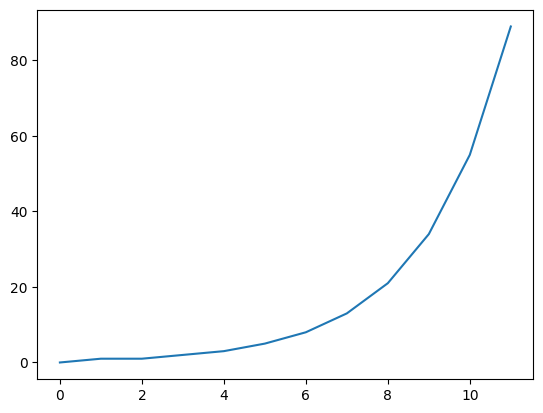

In [4]:
plt.plot(fib)

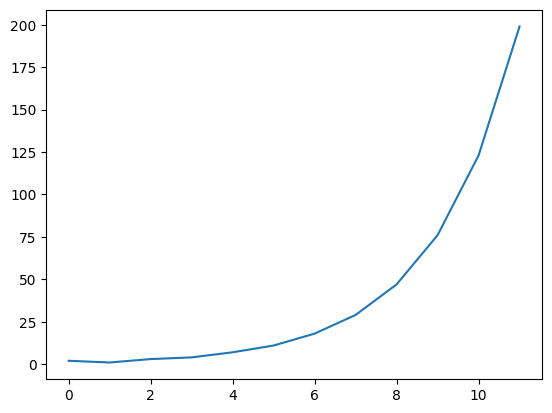

In [5]:
plt.plot(lucas)

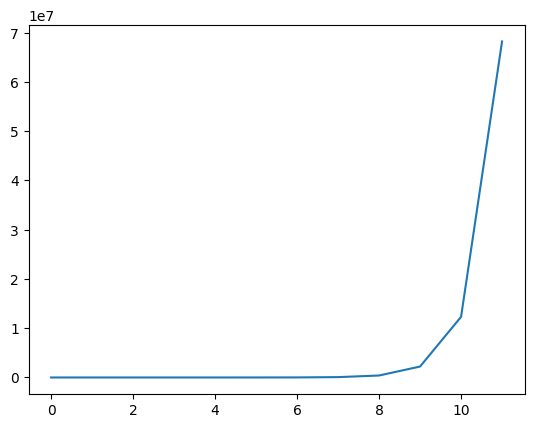

In [6]:
plt.plot(lucasH)

## 2. Modulo *n* ##
An interesting operation to be performed on the sequences $H$ is to apply $mod n$. This operation "converts" the sequence into a periodic one. This means that we have a certains sequence of remainders that keep repeating. The period is called "Pisano period" ($\pi$). The implementation is straightfoward, by means of list comprehension. In the following we apply $mod 12$ to our sequences, this time with a lenght of 100:

In [7]:
fib = [x % 12 for x in fibo(ln=100)]
lucas = [x % 12 for x in fibo(2, ln=100)]
lucasH = [x % 12 for x in fibo(2,1,3,5,3, ln=100)]
print(fib, '\n', lucas, '\n', lucasH)

[0, 1, 1, 2, 3, 5, 8, 1, 9, 10, 7, 5, 0, 5, 5, 10, 3, 1, 4, 5, 9, 2, 11, 1, 0, 1, 1, 2, 3, 5, 8, 1, 9, 10, 7, 5, 0, 5, 5, 10, 3, 1, 4, 5, 9, 2, 11, 1, 0, 1, 1, 2, 3, 5, 8, 1, 9, 10, 7, 5, 0, 5, 5, 10, 3, 1, 4, 5, 9, 2, 11, 1, 0, 1, 1, 2, 3, 5, 8, 1, 9, 10, 7, 5, 0, 5, 5, 10, 3, 1, 4, 5, 9, 2, 11, 1, 0, 1, 1, 2, 3, 5] 
 [2, 1, 3, 4, 7, 11, 6, 5, 11, 4, 3, 7, 10, 5, 3, 8, 11, 7, 6, 1, 7, 8, 3, 11, 2, 1, 3, 4, 7, 11, 6, 5, 11, 4, 3, 7, 10, 5, 3, 8, 11, 7, 6, 1, 7, 8, 3, 11, 2, 1, 3, 4, 7, 11, 6, 5, 11, 4, 3, 7, 10, 5, 3, 8, 11, 7, 6, 1, 7, 8, 3, 11, 2, 1, 3, 4, 7, 11, 6, 5, 11, 4, 3, 7, 10, 5, 3, 8, 11, 7, 6, 1, 7, 8, 3, 11, 2, 1, 3, 4, 7, 11] 
 [2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4, 2, 1, 2, 4, 5, 4]


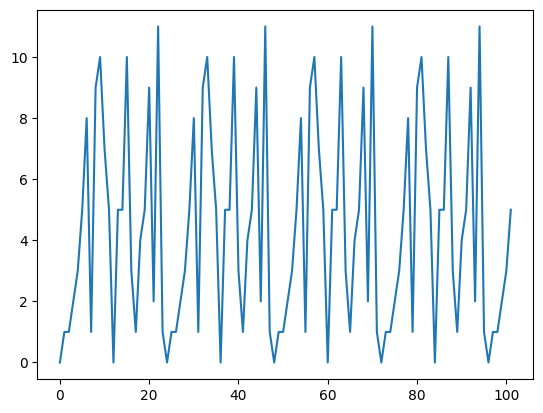

In [8]:
plt.plot(fib)

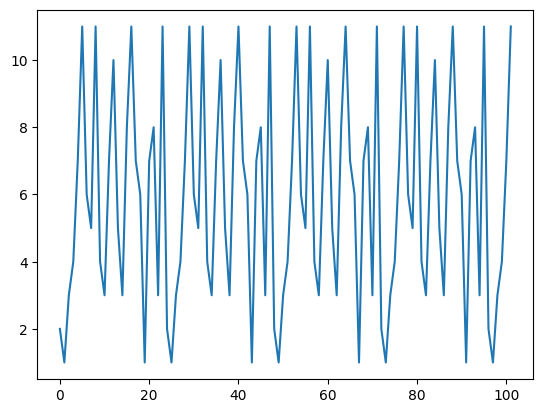

In [9]:
plt.plot(lucas)

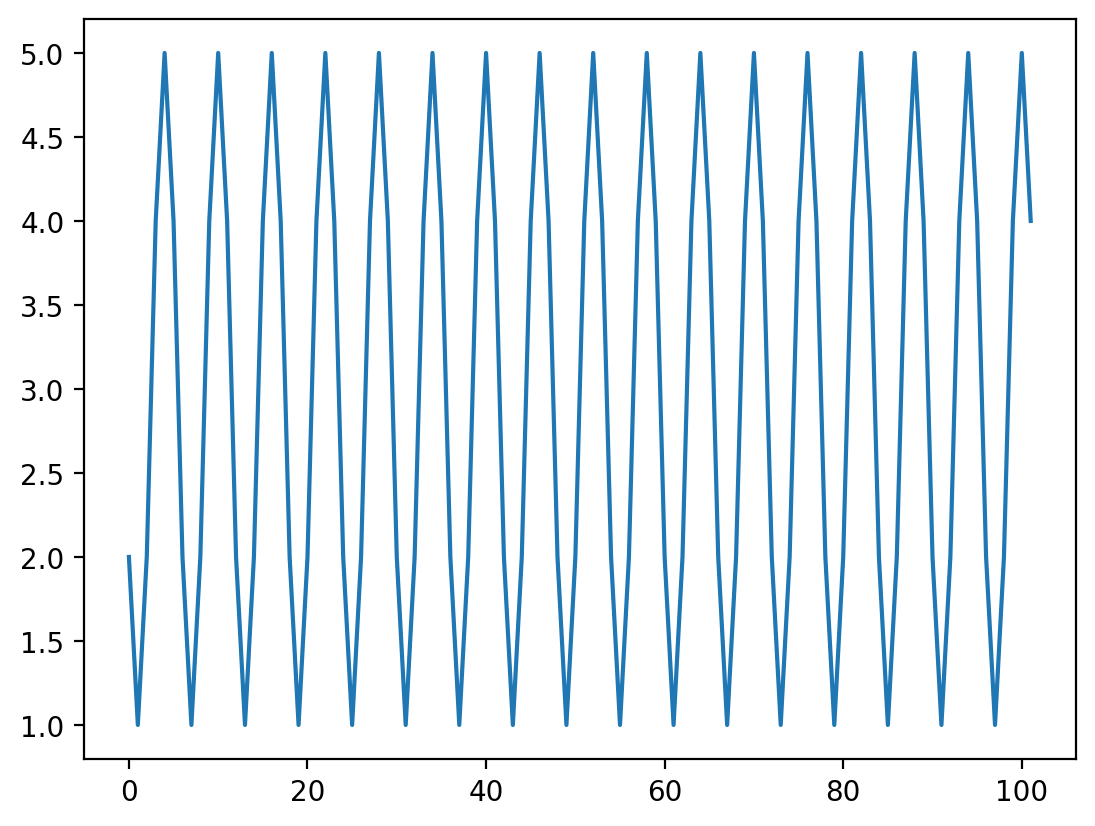

In [ ]:
plt.plot(lucasH)

The periodic behavior emerges clearly, and also the compressed range for ```lucasH``` with a repeating pattern 2, 1, 2, 4, 5, 4. On the other side, ```fib``` and ```lucas``` shows much more complex patterns, yet periodic. Hence the idea of exploiting Fully-generalized Fibonacci sequences with modulo as pattern generators. An empirical way to estimate the period is by computing the ```periodEstimator``` function shown below (for period $\pi >2$).

In [10]:
def periodEstimator(seq, pi=2, piseq=[]):
    if seq[:pi] != seq[(pi+1):((pi+1)+len(seq[:pi]))]:
        pi = pi+1
        piseq.append(pi)
        periodEstimator(seq, pi)
    return piseq[-1]+1


pr = periodEstimator(lucas)
print(pr, lucas[:pr])

pr = periodEstimator(lucasH)
print(pr, lucasH[:pr])

24 [2, 1, 3, 4, 7, 11, 6, 5, 11, 4, 3, 7, 10, 5, 3, 8, 11, 7, 6, 1, 7, 8, 3, 11]
6 [2, 1, 2, 4, 5, 4]


The example shows that ```lucas``` $mod 12$ has a $\pi = 24$ and ```lucasH``` has a $\pi = 6$ (with the relative patterns after). The combination of modulo and period estimation allows to study the resulting pattern. E.g. by plotting:

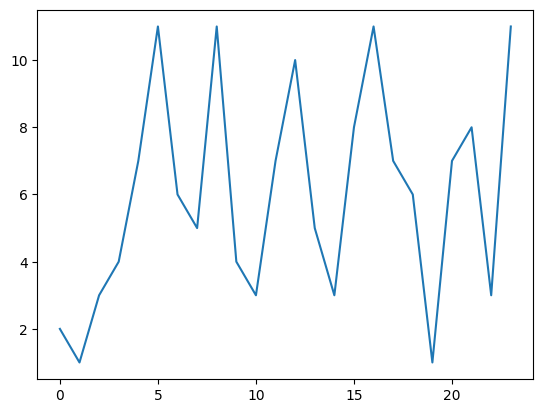

In [11]:
plt.plot(lucas[:periodEstimator(lucas)])

## 3. Pitch class mapping ##

The idea of using Fibonacci numbers to represent pitches has been originally proposed by Joseph Schillinger in his method (in the section *Theory of Melody*, chap. 8, p. 329). Schillinger was thinking about intervals rather than pitches, but he also indicated octave transposition as a way to compress the resulting pitches in a manageable range. Octave transposition is indeed the equivalent of applying $mod 12$. Here we propose to use various moduli to obtain pitches/pitch classes from $H$. In short, we use the periodic patterns as sequences of pitches/pitch classes. We consider integers as indices for pitch information (following atonal music theory, e.g. Forte, Rahn, Straus). If $mod < 12$ then we have fewer pitch classes than the ones available in one octave. If $mod = 12$, then we are taking into account (at least possibily) all chromatic pitch classes. If $mod > 12$ then, of course, we have to consider the integers as pitches rather than pitch classes. While both pitch and pitch class interpretations are possible, here we focus on pitch classes. So, our aim is to develop a way to compute complex pitch class patterns. In the following we will deal with $n > 12$ as a general case, and thus we need a way to compress the integer range in the $[0,11]$ range of pitch classes. The algorithm could be as follows:
1. Generate a fully generalized Fibonacci sequence $H$
2. Apply modulo $n > 12$ to $H$ so to get $H_{1}$
3. Apply modulo $n_{1} = 12$ to $H_{1}$ so to get $H_{2}$

In [12]:
n = 23
seq = [(x % n) % 12 for x in fibo(2,1,3,5,3)]
print(seq)

[2, 1, 2, 7, 11, 10, 5, 3, 0, 0, 5, 9, 7, 7, 4, 11, 1, 6, 4, 8, 9, 3, 10, 7, 0, 3, 10, 8, 8, 11, 1, 9, 6, 5, 1, 2, 8, 7, 6, 8, 3, 10, 6, 5, 2, 9, 9, 8, 5, 7, 9, 4, 5, 8, 2, 2, 10, 3, 2, 10, 4, 8, 0, 5, 7, 11, 0, 1, 10, 2, 1, 4, 3, 7, 1, 6, 1, 5, 0, 10, 11, 9, 0, 9, 6, 4, 6, 1, 7, 8, 6, 2, 9, 10, 3, 6, 9, 8, 3, 0, 2, 1, 5, 9, 8, 2, 5, 1, 0, 6, 10, 2, 8, 5, 10, 0, 1, 9, 7, 0, 2, 4, 7, 6, 0, 2, 3, 1, 5, 10, 3, 3, 6, 0, 11, 0, 4, 1, 11, 5, 3, 1, 7, 6, 10, 6, 7, 10, 5, 0, 9, 3, 1, 9, 9, 7, 10, 6, 8, 5, 6, 2, 8, 3, 7, 3, 8, 10, 9, 0, 8, 11, 3, 5, 2, 7, 2, 1, 2, 7, 11, 10, 5, 3, 0, 0, 5, 9, 7, 7, 4, 11, 1, 6, 4, 8, 9, 3, 10, 7, 0, 3, 10, 8, 8, 11, 1, 9, 6, 5, 1, 2, 8, 7, 6, 8, 3, 10, 6, 5, 2, 9, 9, 8, 5, 7, 9, 4, 5, 8, 2, 2, 10, 3, 2, 10, 4, 8, 0, 5, 7, 11, 0, 1, 10, 2, 1, 4, 3, 7, 1, 6, 1, 5, 0, 10, 11, 9, 0, 9, 6, 4, 6, 1, 7, 8, 6, 2, 9, 10, 3, 6, 9, 8, 3, 0, 2, 1, 5, 9, 8, 2, 5, 1, 0, 6, 10, 2, 8, 5, 10, 0, 1, 9, 7, 0, 2, 4, 7, 6, 0, 2, 3, 1, 5, 10, 3, 3, 6, 0, 11, 0, 4, 1, 11, 5, 3, 1, 7,

Ian Ring has an impressive website where he generated tons of information concerning scales (that is: all combinations of 12 pitch classes). He uses a bit form notation left-wise, so a C major is $[0,2,4,5,7,9,11]$ in Forte notation while the bit form is $[1,0,1,0,1,1, 0, 1,0,1, 0,1]$. We can use the following to move from the bit representation to a decimal one (a nominal one, properly), so we compute the number for the scale (here 2741).

In [13]:
def convertToInt(bitSeq):
    bit = bitSeq[::-1]
    st = ""
    for x in bit:
        st = st+str(x)
    return int(st,2)

print(convertToInt([1,0,1,0,1,1, 0, 1,0,1, 0,1]))

2741


This number is interesting because it allows us to directly point to Ring's website for that [scale](https://ianring.com/musictheory/scales/2741). With this code:

In [16]:
import webbrowser
scale  = [1,0,1,0,1,1, 0, 1,0,1, 0,1]
decimalF = convertToInt(scale)
# this may not work in colab, but works locally
webbrowser.open('https://ianring.com/musictheory/scales/'+str(decimalF))  # Go to 2741

False

Now, we can get a compact set of information after generating a certain $H$ with the following:

In [17]:
def getData(seq):
    p = periodEstimator(seq)
    pitches = seq[:p]
    seq = set(seq)
    seq = list(seq)
    pitchClass = sorted(seq)
    occurrences = [pitches.count(x) for x in range(12)]
    if pitchClass[0] != 0:
        normToScale = [x - pitchClass[0] for x in pitchClass]
    else:
        normToScale = pitchClass
    bit = [1 if x in normToScale else 0 for x in range(12)]
    nominal = convertToInt(bit)
    return(p, pitches, occurrences, pitchClass, bit, nominal)

Here ```p``` is the period $\pi$, ```pitches``` is the actual sequence,  ```occurrences``` is the count of occurrences for each pitch class, ```pitchClass``` is the sequence of pith classes, ```bit``` and ```nominal``` the bit and nominal forms.

In [18]:
p, pitches, occurrences, pitchClass, bit, nominal = getData(lucas)
print('period: ', p, '\nsequence: ', pitches, '\noccurrences: ', occurrences, '\npitchClasses:', pitchClass, '\nbit/nominal: ', bit, nominal)

period:  24 
sequence:  [2, 1, 3, 4, 7, 11, 6, 5, 11, 4, 3, 7, 10, 5, 3, 8, 11, 7, 6, 1, 7, 8, 3, 11] 
occurrences:  [0, 2, 1, 4, 2, 2, 2, 4, 2, 0, 1, 4] 
pitchClasses: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11] 
bit/nominal:  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] 1791


Note that in Ring's format we alway start from class 0, so actually we have transposed down a semitone, but for scale analysis we are interested in the scale form, not in absolute pitch classes. Data made available from ```getData``` allows to plot e.g. pitch classes vs occurrence, like in the following, in which it is clear that we are missing two pitch classes (0 and 9).

<BarContainer object of 12 artists>

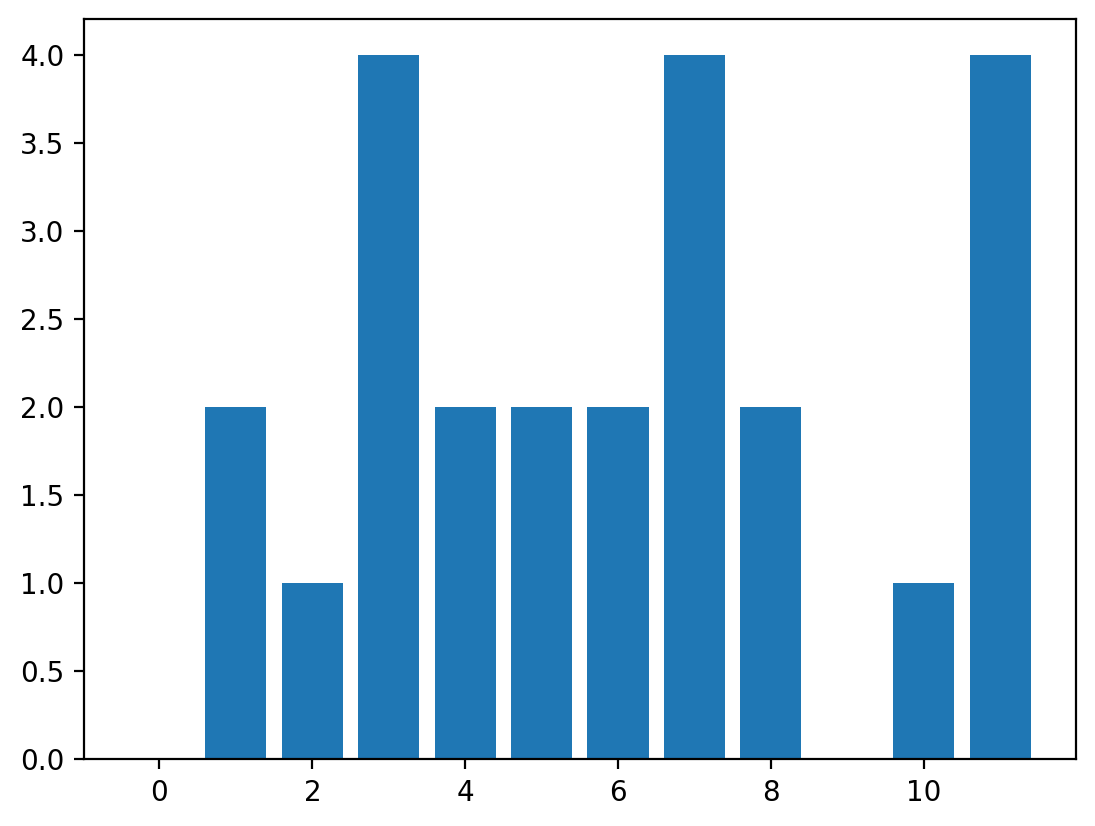

In [ ]:
plt.bar(range(len(occurrences)), occurrences)

An interesting visualization for the pattern can be devised. We call it the "sequence graph". As we have seen, generalized Fibonacci sequences mod $n$ allows to generate simultaneously a scale *and* a repeating melody. A "Sequence Graph" shows in a compact way this twofold nature. Nodes represent pitch classes (integers as labels), their radius being proportional to the number of occurrences (node $7$ is the largest). Edges represent the sequencing order, as specified by each edge label. The graph is by definition directed and cyclic. The dotted edge indicates the cycle loop and can also be used to quickly identify the starting node. Its label indicates the Pisano period. We can compute it using [Graphviz](https://www.graphviz.org/) via the Python ```pydot``` library.

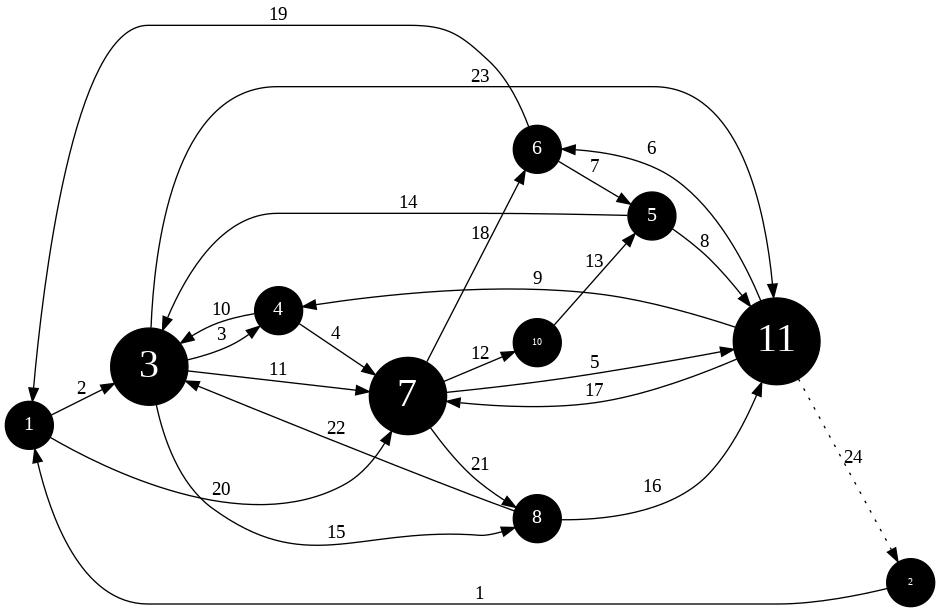

In [19]:
import pydot
from IPython.display import Image, display

def sequenceGraphPlotter(pitches, occurrences):
    norm =[x/max(occurrences) for x in occurrences]
    graph = pydot.Dot('pcGraph', graph_type='digraph', bgcolor='white', rankdir='LR')
    i = 0
    for x in norm:
        sz = str(x * 30)
        if x > 0:
            graph.add_node(pydot.Node(str(i), shape='circle', style="filled", fontcolor='white', fillcolor='black', fontsize=sz))
        i = i+1
    for x in range(len(pitches)-1):
        graph.add_edge(pydot.Edge(str(pitches[x]), str(pitches[x+1]), label=str(x+1)))
    graph.add_edge(pydot.Edge(str(pitches[-1]), str(pitches[0]), label=str(len(pitches)), style='dotted'))
    im = Image(graph.create_jpeg())
    display(im)

p, pitches, occurrences, pitchClass, bit, nominal = getData(lucas)
sequenceGraphPlotter(pitches, occurrences)

The situation can indeed become much more complicate, so that experimentation becomes the key. Let us see this example:

period:  176 
sequence:  [2, 1, 2, 7, 11, 10, 5, 3, 0, 0, 5, 9, 7, 7, 4, 11, 1, 6, 4, 8, 9, 3, 10, 7, 0, 3, 10, 8, 8, 11, 1, 9, 6, 5, 1, 2, 8, 7, 6, 8, 3, 10, 6, 5, 2, 9, 9, 8, 5, 7, 9, 4, 5, 8, 2, 2, 10, 3, 2, 10, 4, 8, 0, 5, 7, 11, 0, 1, 10, 2, 1, 4, 3, 7, 1, 6, 1, 5, 0, 10, 11, 9, 0, 9, 6, 4, 6, 1, 7, 8, 6, 2, 9, 10, 3, 6, 9, 8, 3, 0, 2, 1, 5, 9, 8, 2, 5, 1, 0, 6, 10, 2, 8, 5, 10, 0, 1, 9, 7, 0, 2, 4, 7, 6, 0, 2, 3, 1, 5, 10, 3, 3, 6, 0, 11, 0, 4, 1, 11, 5, 3, 1, 7, 6, 10, 6, 7, 10, 5, 0, 9, 3, 1, 9, 9, 7, 10, 6, 8, 5, 6, 2, 8, 3, 7, 3, 8, 10, 9, 0, 8, 11, 3, 5, 2, 7] 
occurrences:  [16, 16, 16, 16, 8, 16, 16, 16, 16, 16, 16, 8] 
pitchClasses: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 
bit/nominal:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 4095


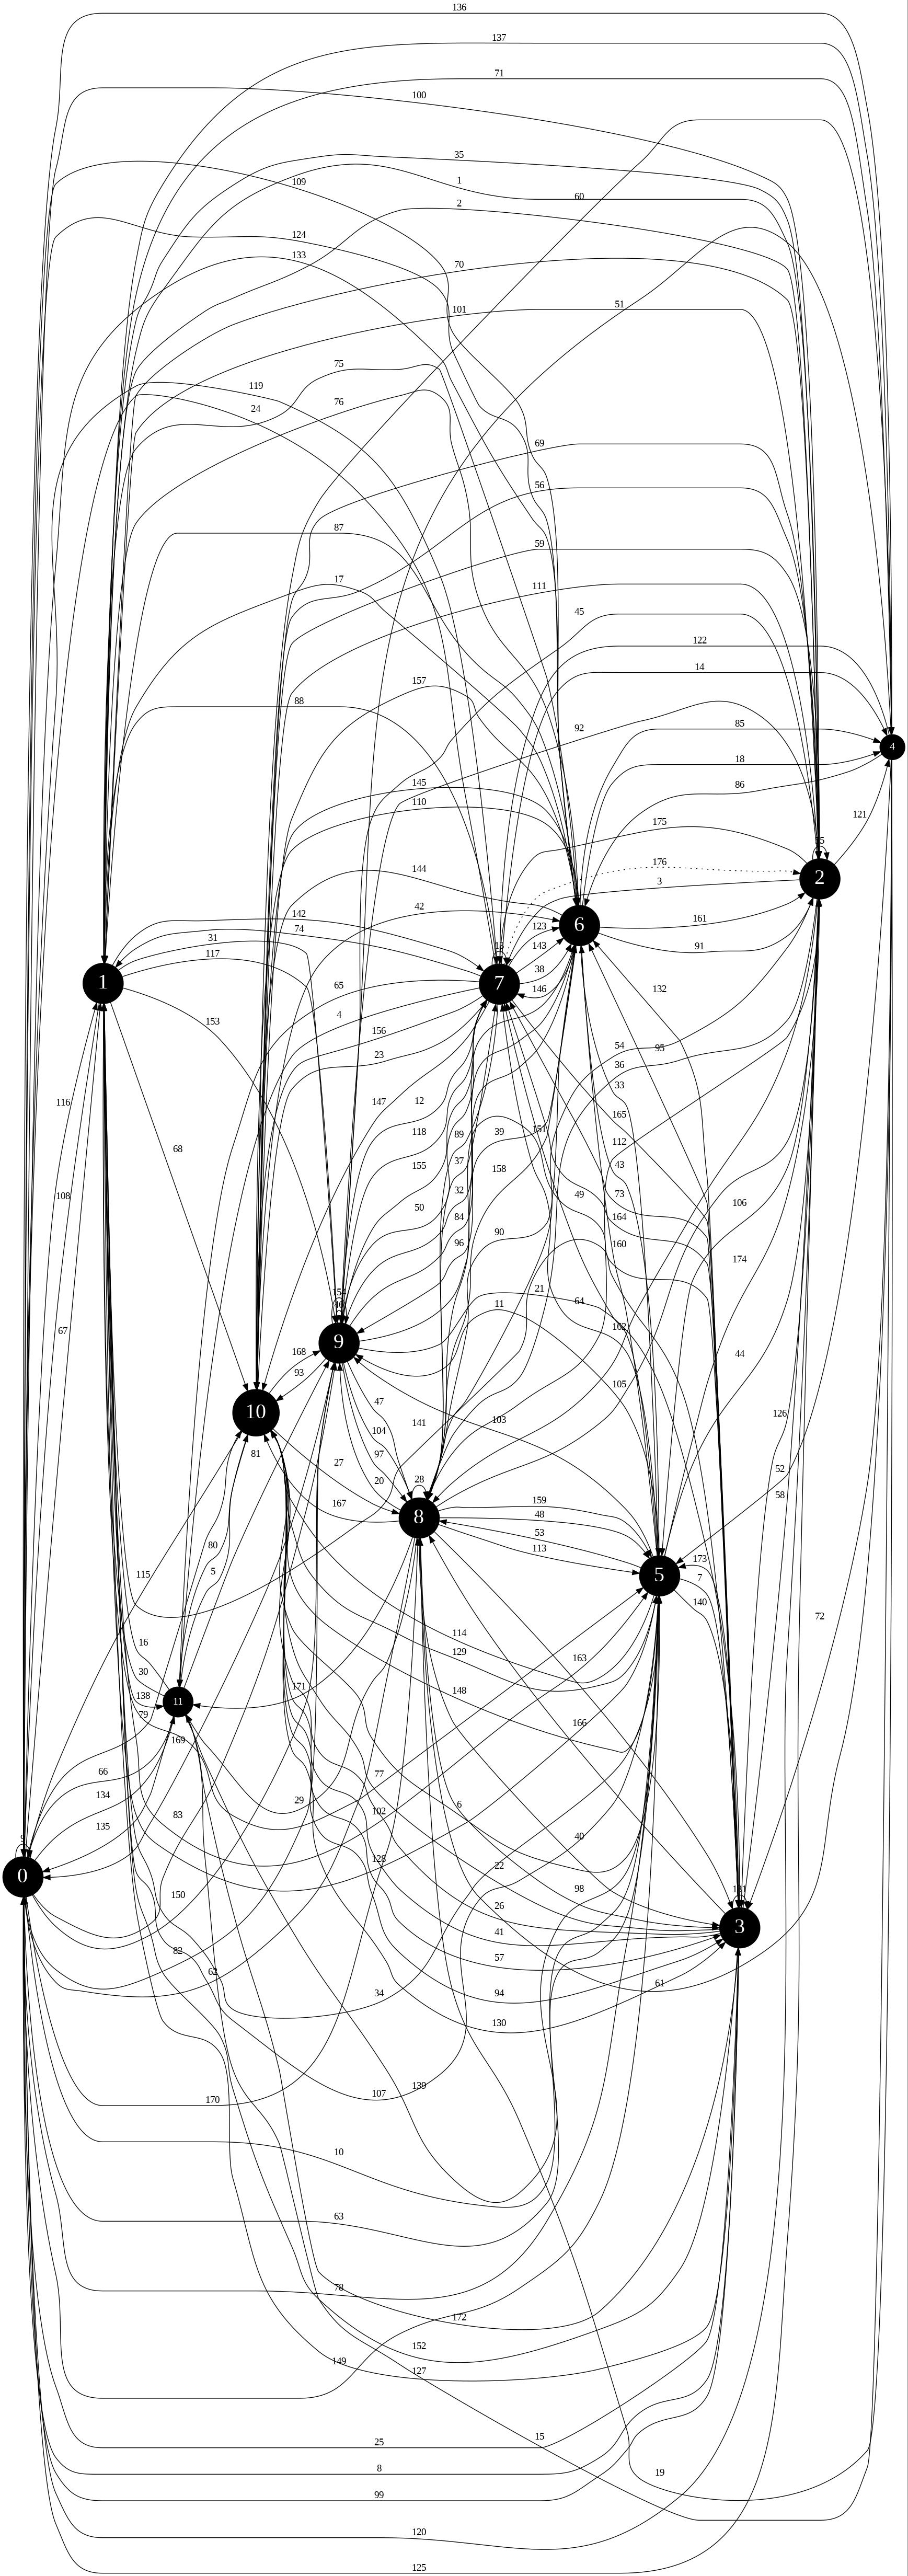

In [20]:
n = 23
c = [ (x % n) % 12 for x in fibo(2,1,3,5,3,1000)]
p, pitches, occurrences, pitchClass, bit, nominal = getData(c)
print('period: ', p, '\nsequence: ', pitches, '\noccurrences: ', occurrences, '\npitchClasses:', pitchClass, '\nbit/nominal: ', bit, nominal)
sequenceGraphPlotter(pitches, occurrences)

What to do with these data from a musical perspective? Indeed, these patterns can be exploited in algorithmic composition. Here we are still focusing only on pitch classes, so we do not deal with rhythmic aspects, layering, transpositions, orchestration etc. If the [music21](https://www.music21.org/) library is installed, it is easy to move from data computation to music results. Music21 offers a lot of options for the generation of symbolic notation and is capable of writing in the MusicXML format, that is now widely supported in music notation editors. This allows a seamless bridge between computation and notation. As a proof of concept, we define the following function:

In [ ]:
from  music21 import *

# this does not work in colab as it writes a file
# check on your local machine

def makeHStream(seq):
    s = stream.Stream()
    for x in seq:
        n = note.Note(x+60)
        d = duration.Duration(1)
        n.duration = d
        s.append(n)
    #s.insert(0, tempo.MetronomeMark(60))
    s.write('musicxml', 'fibo/testH')

# here we are using the previously defined pitches
makeHStream(pitches)

Once generate, we can load the image. Note that Music21 allows to show interactively the score.

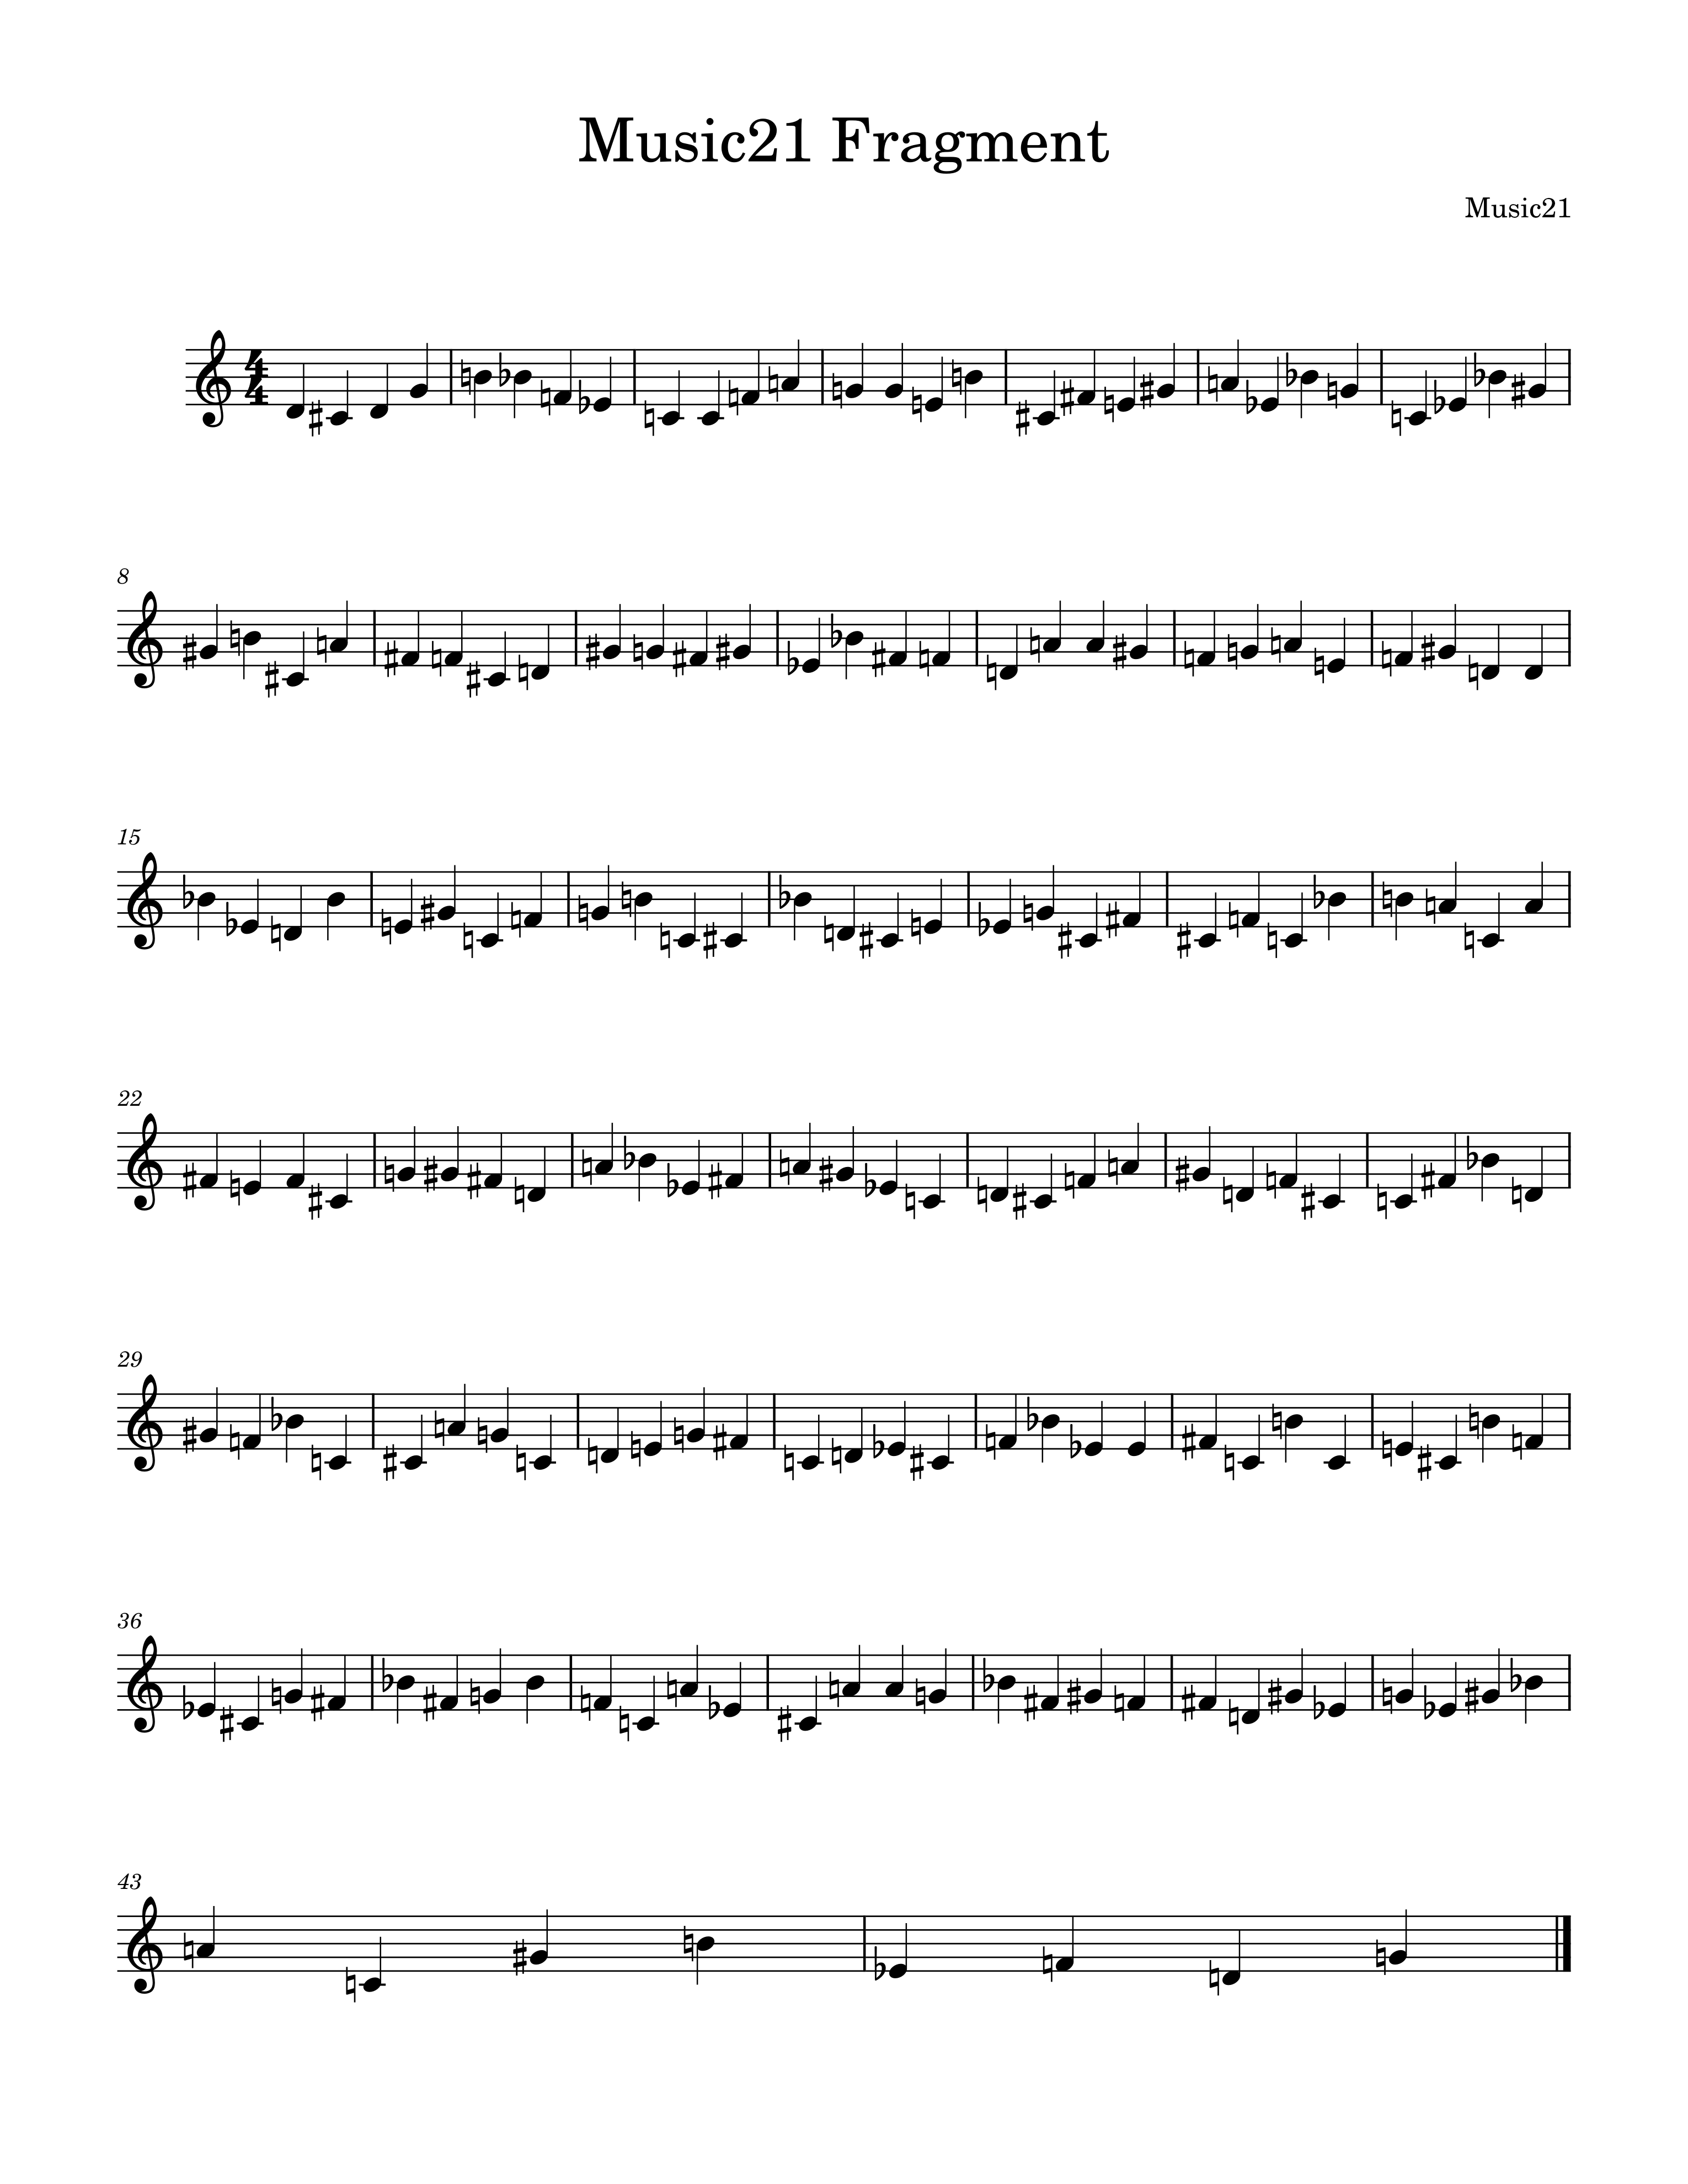

In [ ]:
Image("fibo/testH-1.png")

There are 44 4/4 bars for a total = 176 quarters, which is in fact our period $\pi$.